---
title: Results
format:
  html:
    code-fold: true
output-file: overview.html
---

In [12]:
from beforerr.r import py2rpy_polars

In [13]:
#| hide
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Setup

### Import libraries

In [14]:
from fastcore.utils import *

from ids_finder.utils.basic import *
from ids_finder.utils.polars import pl_norm

from datetime import timedelta

import polars as pl
import polars.selectors as cs
import pandas as pd
import numpy as np

import seaborn as sns

In [15]:
#| output: False
from ids_finder.utils.basic import load_catalog

catalog = load_catalog('../../')

[10/27/23 12:37:04] WARNING  KedroDeprecationWarning: 'PartitionedDataset' has been moved to          ]8;id=862688;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/astropy/logger.py\logger.py]8;;\:]8;id=549119;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/astropy/logger.py#205\205]8;;\
                             `kedro-datasets` and will be removed in Kedro 0.19.0.                                 
                                                                                                                   

                    WARNING  KedroDeprecationWarning: 'PartitionedDataset' has been moved to          ]8;id=606667;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/astropy/logger.py\logger.py]8;;\:]8;id=780034;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/astropy/logger.py#205\205]8;;\
                             `kedro-datasets` and will be removed in Kedro 0.19.0.                                 
                                                                                                                   

                    WARNING  KedroDeprecationWarning: 'AbstractVersionedDataSet' has been renamed to  ]8;id=728842;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/astropy/logger.py\logger.py]8;;\:]8;id=378841;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/astropy/logger.py#205\205]8;;\
                             'AbstractVersionedDataset', and the alias will be removed in Kedro                    
                             0.19.0                                                                                
                                                                                                                   

In [31]:
from ids_finder.datasets import cIDsDataset

sta_dataset = cIDsDataset(sat_id="STA", tau=60, ts=1, catalog=catalog)
jno_dataset = cIDsDataset(sat_id="JNO", tau=60, ts=1, catalog=catalog)
thb_dataset = cIDsDataset(sat_id="THB", tau=60, ts=1, catalog=catalog)

[10/27/23 12:47:58] INFO     Loading data from 'candidates.STA_ts_1s_tau_60s'                   ]8;id=549363;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=213927;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/kedro/io/data_catalog.py#502\502]8;;\
                             (LazyPolarsDataset)...                                                                

                    INFO     Loading data from 'STA.primary_mag_ts_1s' (PartitionedDataset)...  ]8;id=251866;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=141185;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/kedro/io/data_catalog.py#502\502]8;;\

                    INFO     Loading data from 'candidates.JNO_ts_1s_tau_60s'                   ]8;id=570985;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=756939;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/kedro/io/data_catalog.py#502\502]8;;\
                             (LazyPolarsDataset)...                                                                

                    INFO     Loading data from 'JNO.primary_mag_ts_1s' (PartitionedDataset)...  ]8;id=934637;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=47505;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/kedro/io/data_catalog.py#502\502]8;;\

                    INFO     Loading data from 'candidates.THB_ts_1s_tau_60s'                   ]8;id=625770;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=281950;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/kedro/io/data_catalog.py#502\502]8;;\
                             (LazyPolarsDataset)...                                                                

                    INFO     Loading data from 'THB.primary_mag_ts_1s' (PartitionedDataset)...  ]8;id=780357;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=14800;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/kedro/io/data_catalog.py#502\502]8;;\

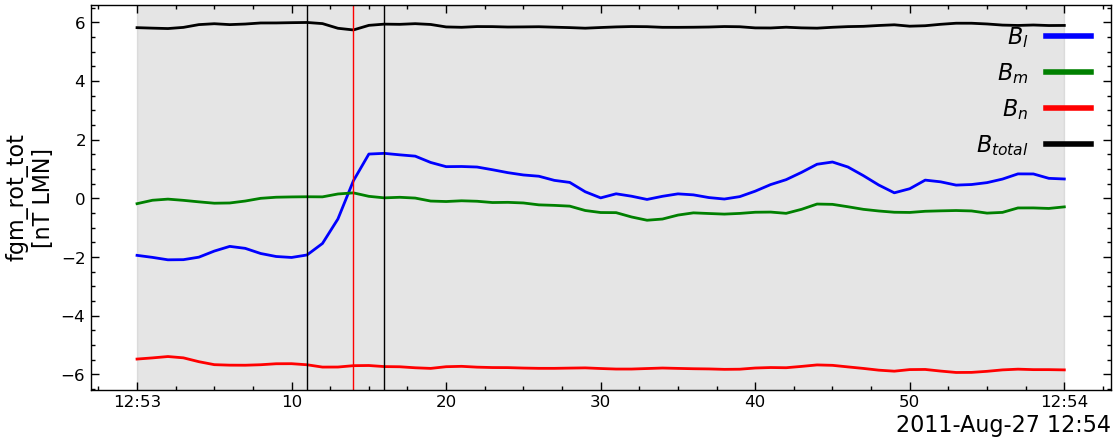

In [49]:
thb_dataset.plot_candidate(index = 34)

jno_dataset.plot_candidate(index = 50078)

## Visualization of data gaps

## JUNO Overview
### Magnetic field strength vs. distance

### $dB_l/B$

- $dB_l/B$ does not show any clear correlation with time.

### Waiting time

### Amplitude

### Plotting candidates of different types of discontinuities

In [10]:
# alt.Chart(candidates).mark_point().encode(
#     x='yearmonth(time)',
#     y='count()',
#     color='type',
# )

In [ ]:
alt.Chart(candidates_jno_tau_60s.to_pandas()).mark_point().encode(
    x='X',
    y='count(type)',
    color='type',
)

### Duration